In [1]:
import torch_directml
from math2latex.dataset import LatexEquationDataset
from matplotlib import pyplot as plt
from math2latex.model import Model
from math2latex.training import train
import torch

In [2]:
device = torch.device(torch_directml.device())
# device = torch.device("cpu")
print(device)

privateuseone:0


In [3]:
dataset = LatexEquationDataset()
dataloader = dataset.get_dataloader(batch_size=2)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


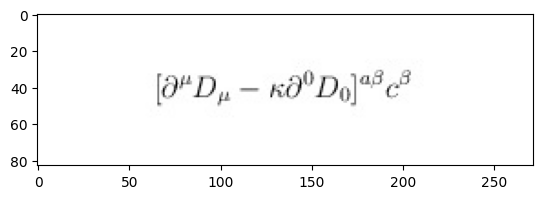

tensor([  63,  121,   94,  115, 1193,  187,  768,  177,  335,   39,  146,  177,
        2260,  388,  109,  187,  573,   19,   96,   39,  112,   19, 3696,   68,
          63,  198,  335,   70,  181,  198,  505,  122,   94,  115,  113,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


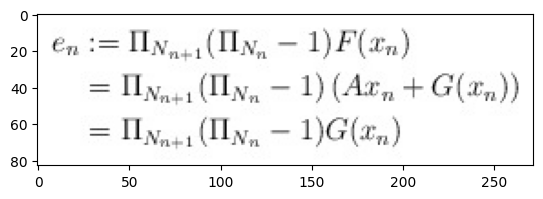

tensor([  63,  121,   94,  115,  113,   72,  112,   81,   96,  155, 1081,  566,
         112,   49,  112,   81,   14,   20,  660,  566,  112,   49,  112,   81,
         929,   20,   12,   41,   11,   91,  112,   81, 2111,  417,  566,  112,
          49,  112,   81,   14,   20,  660,  566,  112,   49,  112,   81,  929,
          20,  143,  147,   11, 2562,  112,   81,  294,   42,   11,   91,  112,
          81,  376,  148,   12,  549,  417,  566,  112,   49,  112,   81,   14,
          20,  660,  566,  112,   49,  112,   81,  929,   20,   12,   42,   11,
          91,  112,   81,  376,  122,   94,  115,  113])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [4]:
img, latex, mask = next(iter(dataloader))

for i, l, m in zip(img, latex, mask):
    plt.imshow(i.permute(1, 2, 0))
    plt.show()
    print(l)
    print(m)

In [5]:
model = Model(dataset.vocab_size)
model.to(device)
out = model.encode(img.to(device))
print(out.shape)
out = model(img=img.to(device), tgt=latex.to(device))
print(out.shape)

Dropped Escape call with ulEscapeCode : 0x03007703


torch.Size([2, 85, 256])
torch.Size([2, 92, 8000])
